In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshay142003","key":"251516f8a3d14c1c30a1d82e459a1aee"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json file to created folder
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            845  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           2427  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           2140  
sanjeetsinghnaik/top-1000-highest-grossing-movies           Top 1000 Highest Grossing Movies                 106KB  2022-01-15 16:26:14           1568  
iamsouravbanerjee/analytics-industry-salaries-2022-india    Data Professionals Sal

In [ ]:
!kaggle datasets download -d smid80/weatherww2

  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 55.2MB/s]


In [ ]:
!unzip weatherww2.zip

Archive:  weatherww2.zip
  inflating: Summary of Weather.csv  
  inflating: Weather Station Locations.csv  


In [ ]:
# Imports
import torch

import torchvision
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
# Other constants
#DATASET_URL = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
DATA_FILENAME = "Summary of Weather.csv"
TARGET_COLUMN = 'MaxTemp'
dataframe = pd.read_csv(DATA_FILENAME)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataframe.drop(["Date"], axis = 1, inplace = True)
dataframe.drop(["PRCP"], axis = 1, inplace = True)
dataframe.drop(["STA"], axis = 1, inplace = True)
dataframe.drop(["WindGustSpd"], axis = 1, inplace = True)
dataframe.drop(["YR"], axis = 1, inplace = True)
dataframe.drop(["MO"], axis = 1, inplace = True)
dataframe.drop(["DA"], axis = 1, inplace = True)
dataframe.drop(["DR"], axis = 1, inplace = True)
dataframe.drop(["SPD"], axis = 1, inplace = True)

dataframe.drop(["SND"], axis = 1, inplace = True)
dataframe.drop(["FT"], axis = 1, inplace = True)
dataframe.drop(["FTI"], axis = 1, inplace = True)
dataframe.drop(["FB"], axis = 1, inplace = True)
dataframe.drop(["ITH"], axis = 1, inplace = True)
dataframe.drop(["TSHDSBRSGF"], axis = 1, inplace = True)
dataframe.drop(["PGT"], axis = 1, inplace = True)
dataframe.drop(["SD3"], axis = 1, inplace = True)
dataframe.drop(["RHX"], axis = 1, inplace = True)
dataframe.drop(["RHN"], axis = 1, inplace = True)
dataframe.drop(["RVG"], axis = 1, inplace = True)
dataframe.drop(["WTE"], axis = 1, inplace = True)
dataframe.drop(["MAX"], axis = 1, inplace = True)
dataframe.drop(["MIN"], axis = 1, inplace = True)
dataframe.drop(["MEA"], axis = 1, inplace = True)
dataframe.drop(["SNF"], axis = 1, inplace = True)

for col in dataframe.columns:
    if (dataframe[col].dtype == object):
        dataframe[col] = dataframe[col].replace(['T','#VALUE!'],0)
        dataframe[col] = dataframe[col].replace(['1   1','1   1 1  1','1 0','1 0  1','1 1  1','11    1','11 1','1     0','1    1','1   1 1','1     1','1 1','1     1  1','1  1','1        1','1        1'],1)
        dataframe[col] = dataframe[col].fillna(0)
        dataframe[col] = dataframe[col].astype('float32')

dataframe.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
0,1.016,25.555556,22.222222,23.888889,0.0,0.0
1,0.000,28.888889,21.666667,25.555556,0.0,0.0
2,2.540,26.111111,22.222222,24.444444,0.0,0.0
3,2.540,26.666667,22.222222,24.444444,0.0,0.0
4,0.000,26.666667,21.666667,24.444444,0.0,0.0


max MaxTemp:  50.0
min MaxTemp:  -33.33333333
max MinTemp:  34.44444444
min MinTemp:  -38.33333333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'PoorWeather range')]

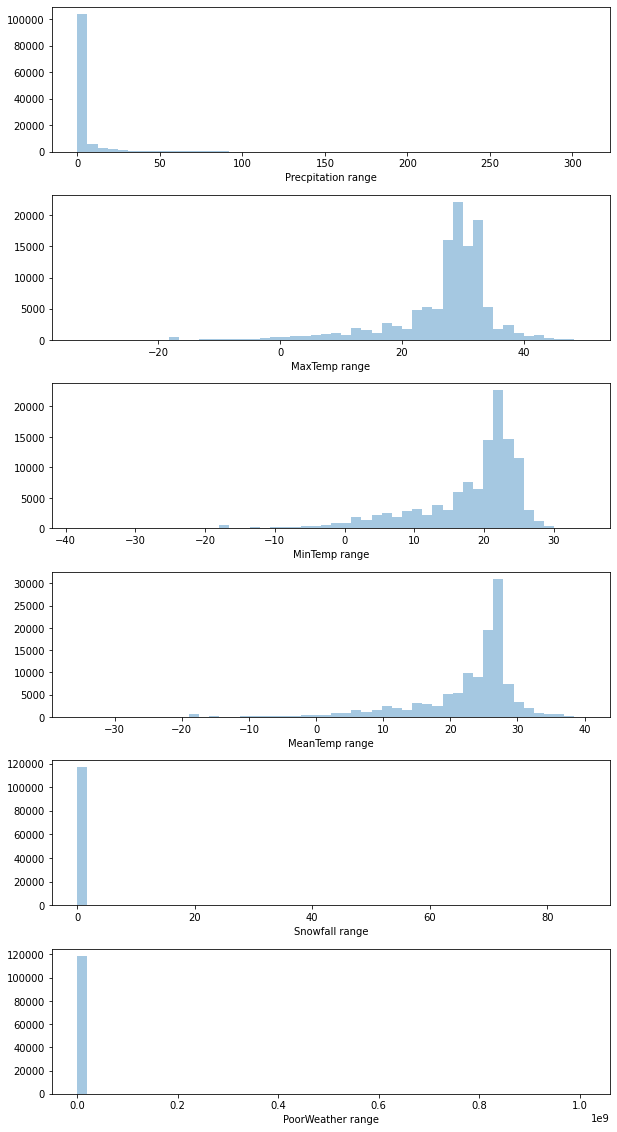

In [ ]:
print("max MaxTemp: ",dataframe['MaxTemp'].max())
print("min MaxTemp: ",dataframe['MaxTemp'].min())
print("max MinTemp: ",dataframe['MinTemp'].max())
print("min MinTemp: ",dataframe['MinTemp'].min())

fig_dims = (10, 20)
fig, axs = plt.subplots(nrows=6,figsize=fig_dims)

plt.subplots_adjust(hspace = 0.3)


pl1 = sns.distplot(dataframe.Precip,ax=axs[0],kde=False);
pl1.set(xlabel = "Precpitation range")

pl2 = sns.distplot(dataframe.MaxTemp,ax=axs[1],kde=False);
pl2.set(xlabel = "MaxTemp range")

pl3 = sns.distplot(dataframe.MinTemp,ax=axs[2],kde=False);
pl3.set(xlabel = "MinTemp range")

pl4 = sns.distplot(dataframe.MeanTemp,ax=axs[3],kde=False);
pl4.set(xlabel = "MeanTemp range")

pl5 = sns.distplot(dataframe.Snowfall,ax=axs[4],kde=False);
pl5.set(xlabel = "Snowfall range")

pl6 = sns.distplot(dataframe.PoorWeather,ax=axs[5],kde=False);
pl6.set(xlabel = "PoorWeather range")


In [ ]:
# Convert from Pandas dataframe to numpy arrays
inputs = dataframe.drop(TARGET_COLUMN, axis=1).values
targets = dataframe[[TARGET_COLUMN]].values
inputs.shape, targets.shape

((119040, 5), (119040, 1))

In [ ]:
inputs.dtype, targets.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
# Hyperparameters
batch_size=5120

# Convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))

num_rows = dataframe.shape[0]

val_percent = 0.1 # between 0.1 and 0.2

val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, (train_size,val_size))

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [ ]:
class WW2TempPreidictionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, xb):
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)                 # Generate predictions
        loss = F.l1_loss(out, targets)    # Calculate loss
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)                 # Generate predictions
        loss = F.l1_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result,num_epochs):
        if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))



In [ ]:
input_size = inputs.shape[1]
output_size = targets.shape[1]
input_size, output_size

(5, 1)

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            #print("Params after calcuating loss: ",list(model.parameters()))
            loss.backward()
            #print("Params after gradient step: ",list(model.parameters()))
            optimizer.step()
            #print("Params after updating grads: ",list(model.parameters()))
            optimizer.zero_grad()
            #print("Params after zero grad: ",list(model.parameters()))
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result,epochs)
        history.append(result)
    return history

In [ ]:
list(train_loader)

[[tensor([[  0.0000,  18.3333,  28.8889,   0.0000,   0.0000],
          [  0.0000,  25.0000,  28.8889,   0.0000,   0.0000],
          [  0.0000,   5.5556,  13.3333,   0.0000,   0.0000],
          ...,
          [  2.2860,  22.7778,  27.2222,   0.0000,   1.0000],
          [  0.0000,  22.2222,  25.5556,   0.0000,   0.0000],
          [110.7440,  21.1111,  23.8889,   0.0000,   1.0000]]),
  tensor([[38.8889],
          [32.2222],
          [21.6667],
          ...,
          [31.6667],
          [28.3333],
          [26.6667]])],
 [tensor([[ 0.0000, 23.3333, 27.2222,  0.0000,  0.0000],
          [ 0.0000, 20.0000, 23.3333,  0.0000,  0.0000],
          [ 0.0000, 18.8889, 25.5556,  0.0000,  0.0000],
          ...,
          [ 0.0000, 10.0000, 17.7778,  0.0000,  0.0000],
          [19.0500, 23.8889, 28.8889,  0.0000,  1.0000],
          [ 0.0000, 21.6667, 26.6667,  0.0000,  0.0000]]), tensor([[31.1111],
          [26.6667],
          [32.7778],
          ...,
          [25.0000],
          [

In [ ]:
model = WW2TempPreidictionModel()
print("Initial loss",evaluate(model, val_loader))
learning_rate=1e-10
history = fit(100,learning_rate, model, train_loader, val_loader)

Initial loss {'val_loss': 230918.828125}
Epoch [9], val_loss: 205590.7188
Epoch [19], val_loss: 180239.6406
Epoch [29], val_loss: 154900.0312
Epoch [39], val_loss: 129545.6562
Epoch [49], val_loss: 104209.4062
Epoch [59], val_loss: 78864.8906
Epoch [69], val_loss: 53492.1992
Epoch [79], val_loss: 28150.9355
Epoch [89], val_loss: 2829.4509
Epoch [99], val_loss: 82.1737


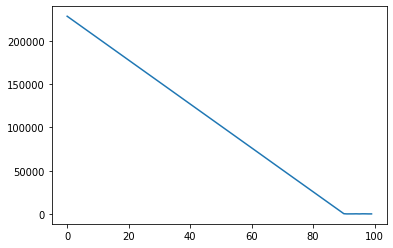

In [ ]:
plot2 = [x['val_loss'] for x in history]
plt.plot(plot2)

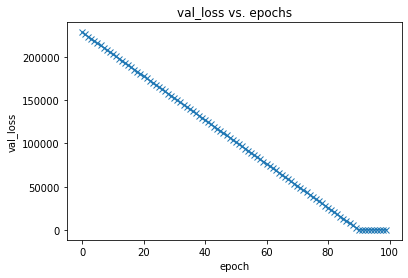

In [ ]:
losses = [r['val_loss'] for r in  history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [ ]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [ ]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([ 3.5560, 10.5556, 13.3333,  0.0000,  1.0000])
Target:  16.66666603088379
Prediction: -2.6577115058898926


In [ ]:
torch.save(model.state_dict(), 'WW2-weather-linear.pth')